In [1]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import datetime
import math
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
games_df = pd.read_csv("./games_processed_table.csv").drop("Unnamed: 0", axis=1)
players_df = pd.read_csv("./players_data_table.csv").drop("Unnamed: 0", axis=1)

In [3]:
p1_win = []
p2_win = []

In [4]:
for i, row in games_df.iterrows():
    p1_id = row["p1_id"]
    p2_id = row["p2_id"]
    winner_id = row["winner_id"]
    if p1_id == winner_id:
        p1_win.append(1)
        p2_win.append(0)
    else:
        p1_win.append(0)
        p2_win.append(1)

In [5]:
data = pd.DataFrame({"p1_win": p1_win, "p2_win": p2_win})

In [6]:
games_df = games_df.join(data)

In [7]:
games_df["p1_id"] = games_df["p1_id"].astype(object)
games_df["p2_id"] = games_df["p2_id"].astype(object)
games_df["winner_id"] = games_df["winner_id"].astype(object)
games_df["match_id"] = games_df["match_id"].astype(object)

### Pie chart that represents the % of matches that player1 had more wins over player2 over their history

<AxesSubplot: ylabel='p1_win'>

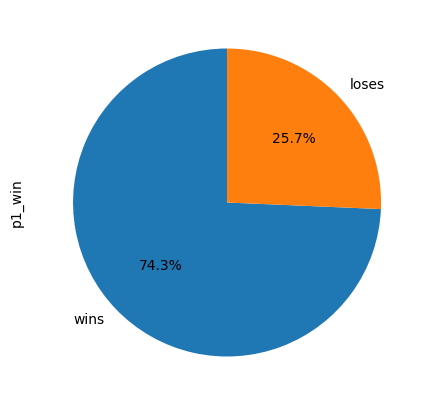

In [8]:
temp_df = games_df[games_df["p1_prevwins"] > games_df["p2_prevwins"]].copy()
temp_df["p1_win"].value_counts().plot.pie(
    figsize=(5, 5), autopct="%1.1f%%", startangle=90, labels=["wins", "loses"]
)

### Checking the home games importance over the year
Here we will try to see the trend of home games vs games away over the last years

In [9]:
years = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
home_wins_count = []
home_loses_count = []

In [10]:
for i in range(len(years)):
    home_wins = 0
    home_loses = 0
    mask = (games_df["date"] >= years[i]) & (games_df["date"] < str(int(years[i]) + 1))
    for j, row in games_df.loc[mask].iterrows():
        if row["p1_home"] != np.nan:
            if row["p1_win"] == 1:
                if row["p2_home"] == 1:
                    home_loses += 1
                else:
                    home_wins += 1
        else:
            pass
    home_wins_count.append(home_wins)
    home_loses_count.append(home_loses)

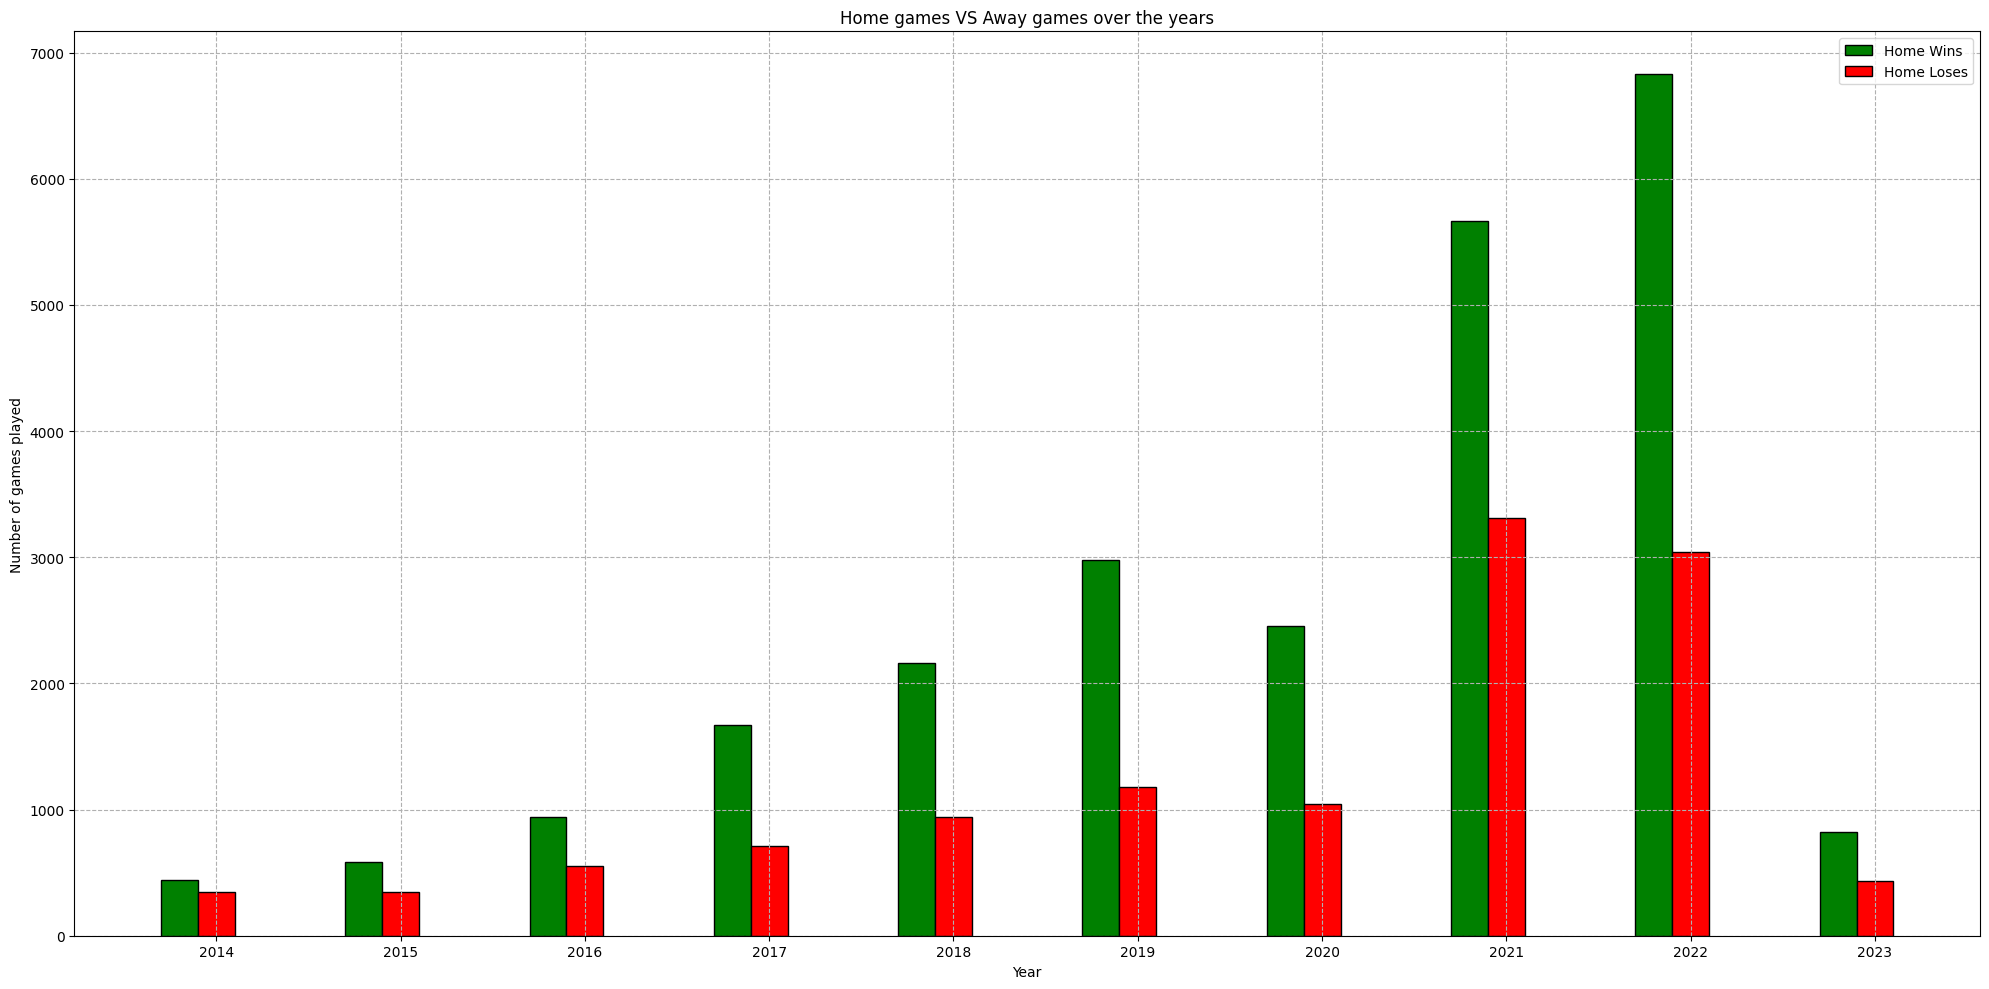

In [11]:
plt.figure(figsize=(20, 10))
n = 10
r = np.arange(n)
width = 0.2

plt.bar(
    r, home_wins_count, color="green", width=width, edgecolor="black", label="Home Wins"
)
plt.bar(
    r + width,
    home_loses_count,
    color="red",
    width=width,
    edgecolor="black",
    label="Home Loses",
)

plt.xlabel("Year")
plt.ylabel("Number of games played")
plt.title("Home games VS Away games over the years")


plt.tight_layout()
plt.grid(linestyle="--")
plt.xticks(r + width, years)
plt.legend()

#### As we can see since 2017 there is a great advantage by playing the matches at home

### Now let's create a column that shows the difference between the two players points

In [12]:
games_df["points_diff"] = games_df["p1_rank"] - games_df["p2_rank"]
games_df["diff_win"] = games_df["p1_win"] - games_df["p2_win"]
games_df

,match_id,match_type,date,p1_id,p1_name,p1_club,p1_rank,p1_sets,p1_home,p1_points_gained,...,p2_points_gained,winner_id,p1_prevwins,p2_prevwins,p1_form,p2_form,p1_win,p2_win,points_diff,diff_win
0,338816,ליגת על גברים 2022-2023,2023-01-03,745,יונתן שוסטרמן,מ. בני הרצליה,1807.8,2,1.0,-10.5,...,15.75,676,8,1,7.5,-21.0,0,1,95.4,-1
1,337989,ליגת על גברים 2022-2023,2022-12-27,745,יונתן שוסטרמן,מ. בני הרצליה,1800.3,3,0.0,1.5,...,-1.00,745,2,0,6.0,-2.0,1,0,729.2,1
2,337992,ליגת על גברים 2022-2023,2022-12-27,745,יונתן שוסטרמן,מ. בני הרצליה,1800.3,3,0.0,1.5,...,-1.00,745,1,0,6.0,-3.0,1,0,666.7,1
3,337511,ליגת על גברים 2022-2023,2022-12-25,745,יונתן שוסטרמן,מ. בני הרצליה,1800.3,3,1.0,1.5,...,-1.00,745,1,0,3.0,-1.0,1,0,742.7,1
4,337516,ליגת על גברים 2022-2023,2022-12-25,745,יונתן שוסטרמן,מ. בני הרצליה,1800.3,3,1.0,3.0,...,-2.00,745,7,0,1.5,0.0,1,0,431.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65099,293649,ליגת א גברים 2021-2022,2022-03-02,3015,טארק קעדאן,הפועל מתנ''ס בקה אל גרבייה,469.0,0,0.0,-1.0,...,1.00,1579,0,0,11.0,7.0,0,1,-402.6,-1
65100,293651,ליגת א גברים 2021-2022,2022-03-02,3015,טארק קעדאן,הפועל מתנ''ס בקה אל גרבייה,469.0,3,0.0,5.0,...,-5.00,3015,0,1,4.0,0.0,1,0,166.9,1
65101,293653,ליגת א גברים 2021-2022,2022-03-02,3015,טארק קעדאן,הפועל מתנ''ס בקה אל גרבייה,469.0,0,0.0,-2.0,...,2.00,526,0,0,13.0,14.0,0,1,-252.2,-1
65102,290032,ליגת א גברים 2021-2022,2022-02-16,3015,טארק קעדאן,הפועל מתנ''ס בקה אל גרבייה,459.0,3,1.0,6.0,...,-6.00,3015,0,0,4.0,-6.0,1,0,107.7,1


In [13]:
games_df["diff_win"].corr(games_df["points_diff"])

0.521275900090222

In [14]:
games_df.drop_duplicates("match_id", inplace=True)


def cross_tabulation(df, col_name, other_col_name):
    ct = pd.crosstab(df[col_name], df[other_col_name], normalize="index")
    return ct


def is_positive(row):
    if float(row["points_diff"]) >= 0:
        return 1
    else:
        return 0

<AxesSubplot: xlabel='points_diff', ylabel='p1_points_gained'>

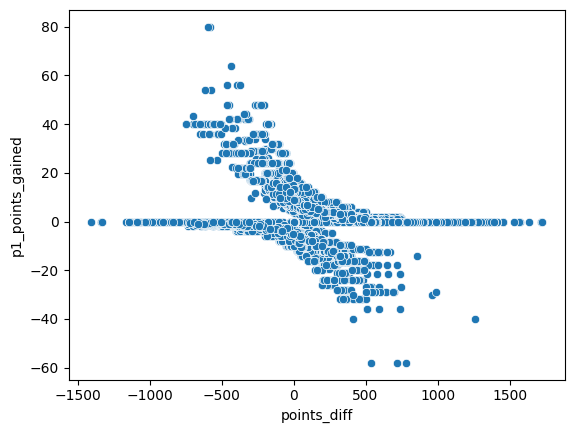

In [15]:
games_df["diff_positive"] = games_df.apply(lambda row: is_positive(row), axis=1)
df_crosstab = cross_tabulation(games_df, "points_diff", "p1_win")
sns.scatterplot(x="points_diff", y="p1_points_gained", data=games_df)

<AxesSubplot: xlabel='p1_form', ylabel='p1_prevwins'>

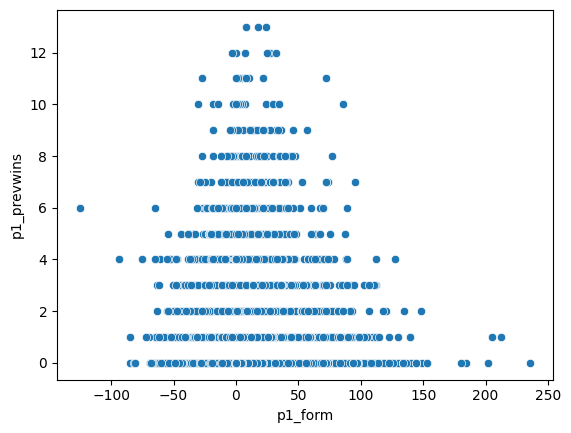

In [16]:
sns.scatterplot(x="p1_form", y="p1_prevwins", data=games_df)

array([[<AxesSubplot: title={'center': 'points_diff'}>]], dtype=object)

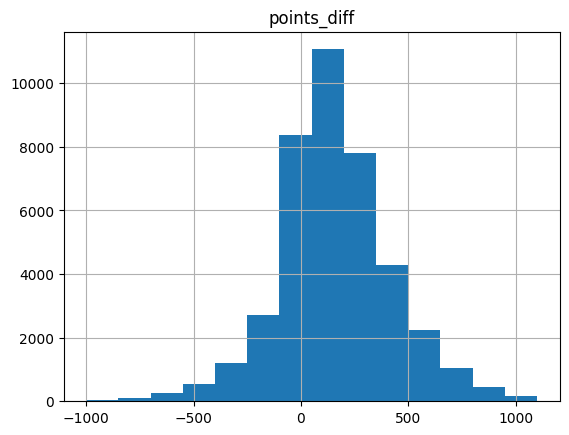

In [17]:
games_df.hist(column="points_diff", bins=np.arange(-1000, 1200, 150))

In this histogram we can see how many games were played with each points difference

#### Checking which columns are highly correlated (From campus.il course)

In [18]:
def get_highly_correlated_cols(df):
    columns = df.columns
    correlations = []
    tuple_arr = []
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            curr = columns[i]
            curr_next = columns[j]
            temp_corr_df = df[[curr, curr_next]].corr()
            curr_value = temp_corr_df[curr][curr_next]
            if curr_value >= 0.4:
                correlations.append(curr_value)
                tuple_arr.append((i, j))
    tuple_arr = tuple(tuple_arr)
    print(tuple_arr)
    return correlations, tuple_arr

In [19]:
def plot_high_correlated_scatters(df):
    columns = df.columns
    corr_arr, tuples_arr = get_highly_correlated_cols(df)
    fig, axs = plt.subplots(1, len(corr_arr), figsize=(15, 5))
    for i in range(len(tuples_arr)):
        first_col = columns[tuples_arr[i][0]]
        second_col = columns[tuples_arr[i][1]]
        temp_df = cross_tabulation(df, first_col, second_col)
        title = "corr('%s', '%s')=%4.2f" % (first_col, second_col, corr_arr[i])
        axs[i].scatter(df[first_col], df[second_col])
        axs[i].set_title(title)
    fig.tight_layout()

((0, 6), (0, 11), (2, 3), (6, 11))


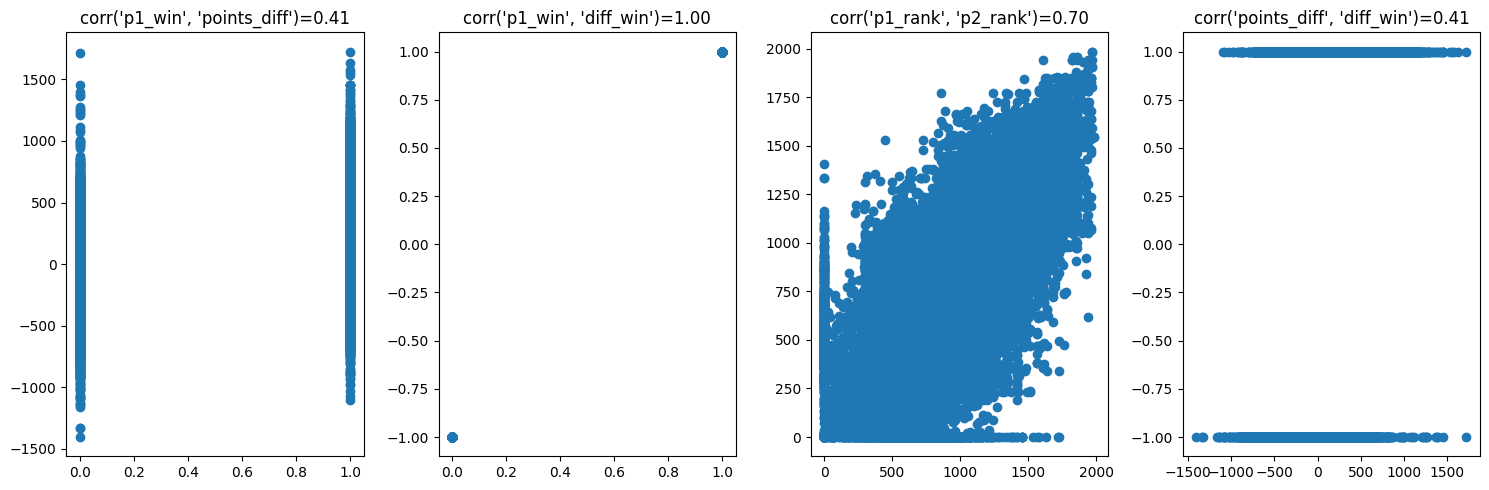

In [20]:
cols_for_corr = [
    "p1_win",
    "p2_win",
    "p1_rank",
    "p2_rank",
    "p1_home",
    "p2_home",
    "points_diff",
    "p1_form",
    "p2_form",
    "p1_prevwins",
    "p2_prevwins",
    "diff_win",
]

plot_high_correlated_scatters(games_df[cols_for_corr])

In [22]:
games_df.to_csv("games_analyzed_table.csv", sep=",", encoding="utf-8-sig")

In [23]:
temp_df = games_df.copy()
temp_df.drop_duplicates("match_id", inplace=True)

## Check the difference between the rank and the wins:
#### most of the time the player with the higher rank is more likely to win

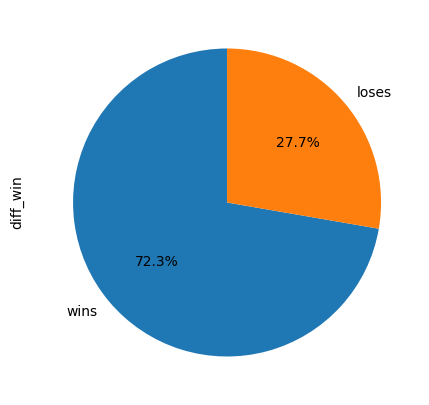

In [24]:
plot = (
    temp_df["diff_win"].value_counts().plot.pie(
        y="diff_win",
        figsize=(5, 5),
        autopct="%1.1f%%",
        startangle=90,
        labels=["wins", "loses"],
    )
)

C:\Users\Shlomi\AppData\Local\Temp\ipykernel_7976\3217221474.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = games_df.corr(method="spearman")


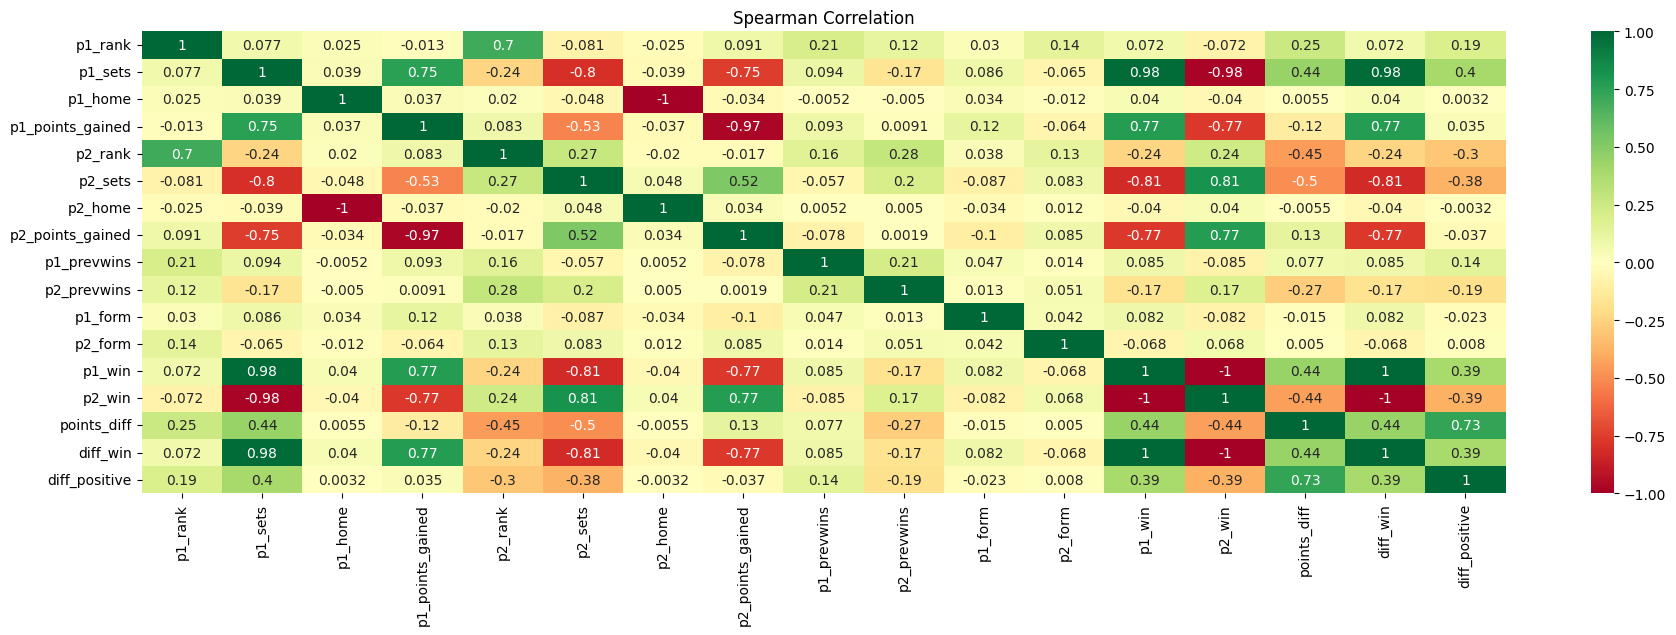

In [25]:
import seaborn as sns

corr_spearman = games_df.corr(method="spearman")

fig = plt.figure(figsize=(22, 6))
sns.heatmap(corr_spearman, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title("Spearman Correlation")
plt.show()

<AxesSubplot: >

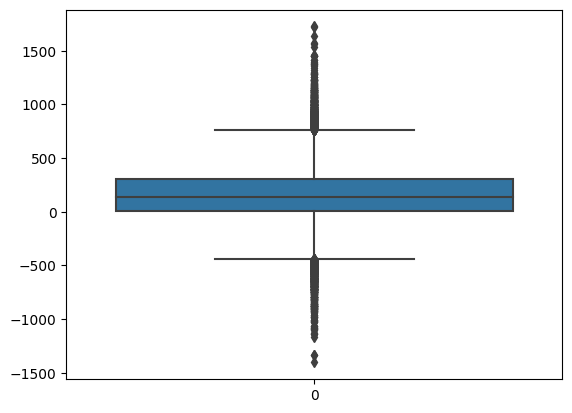

In [26]:
sns.boxplot(games_df.points_diff)

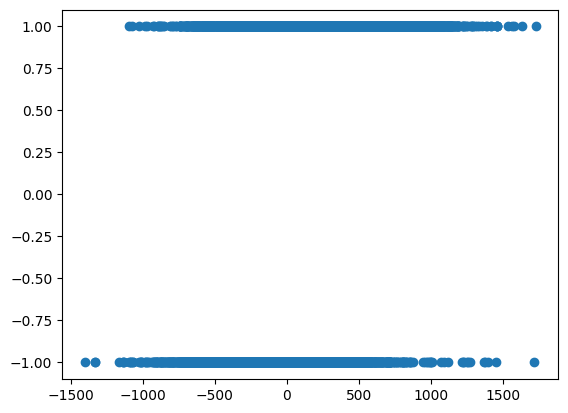

In [27]:
plt.scatter(games_df.points_diff, games_df.diff_win)

In [28]:
sns.boxplot(games_df.diff_win, games_df.points_diff, whis=7)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [30]:
sns.violinplot(games_df.diff_win, games_df.points_diff, whis=7)

TypeError: violinplot() takes from 0 to 1 positional arguments but 2 were given

In [29]:
from scipy.stats import chi2_contingency

C:\Users\Shlomi\AppData\Local\Temp\ipykernel_7976\3631807872.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  h = games_df.groupby(["points_diff"]).mean()[["diff_win", "p1_home", "p2_home"]]


<AxesSubplot: xlabel='points_diff'>

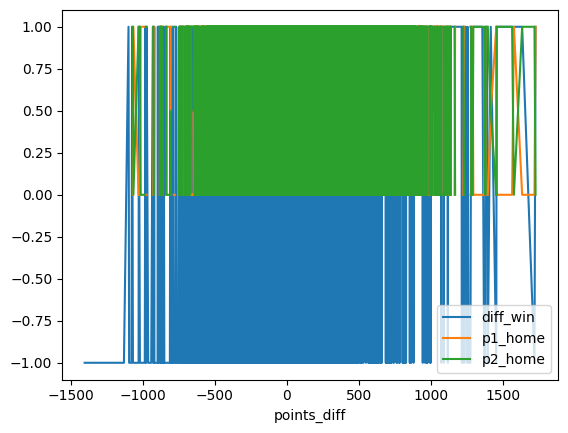

In [31]:
ct1 = pd.crosstab(games_df["points_diff"], games_df["diff_win"])
chi2_contingency(ct1)
h = games_df.groupby(["points_diff"]).mean()[["diff_win", "p1_home", "p2_home"]]
h.plot()

C:\Users\Shlomi\AppData\Local\Temp\ipykernel_7976\1570872097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  h2 = games_df.groupby(["points_diff"]).mean()[["p1_prevwins", "p2_prevwins"]]


<AxesSubplot: xlabel='points_diff'>

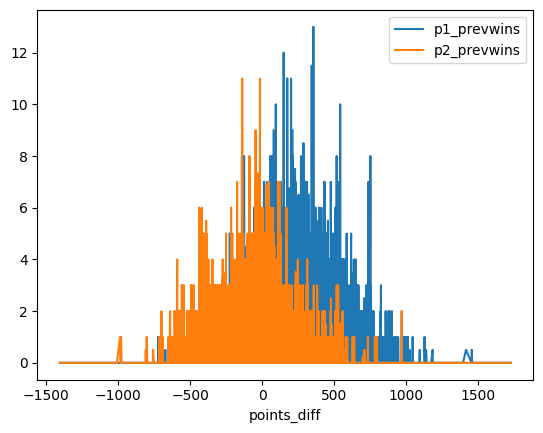

In [32]:
h2 = games_df.groupby(["points_diff"]).mean()[["p1_prevwins", "p2_prevwins"]]
h2.plot()

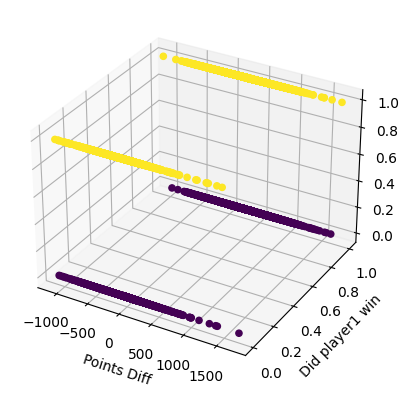

In [33]:
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection="3d")

xdata = games_df.points_diff
ydata = games_df.p1_win
zdata = games_df.p1_home

plt.xlabel("Points Diff")
plt.ylabel("Did player1 win")
ax.scatter3D(xdata, ydata, zdata, c=zdata, depthshade=False)

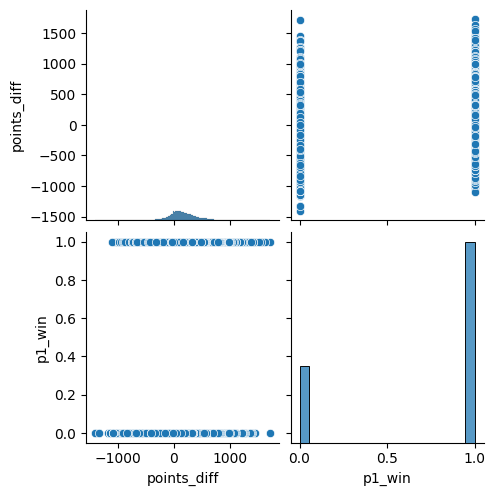

In [34]:
sns.pairplot(games_df[["points_diff", "p1_win"]])

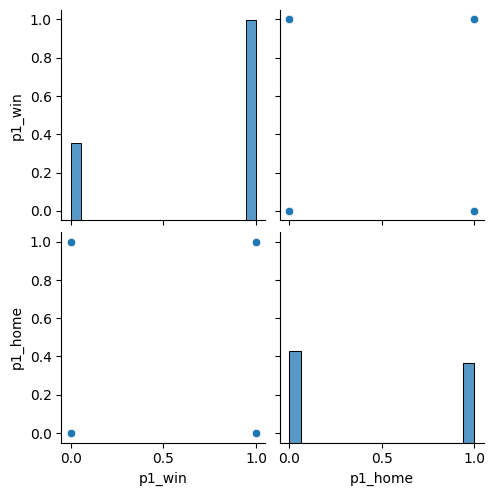

In [35]:
sns.pairplot(games_df[["p1_win", "p1_home"]])

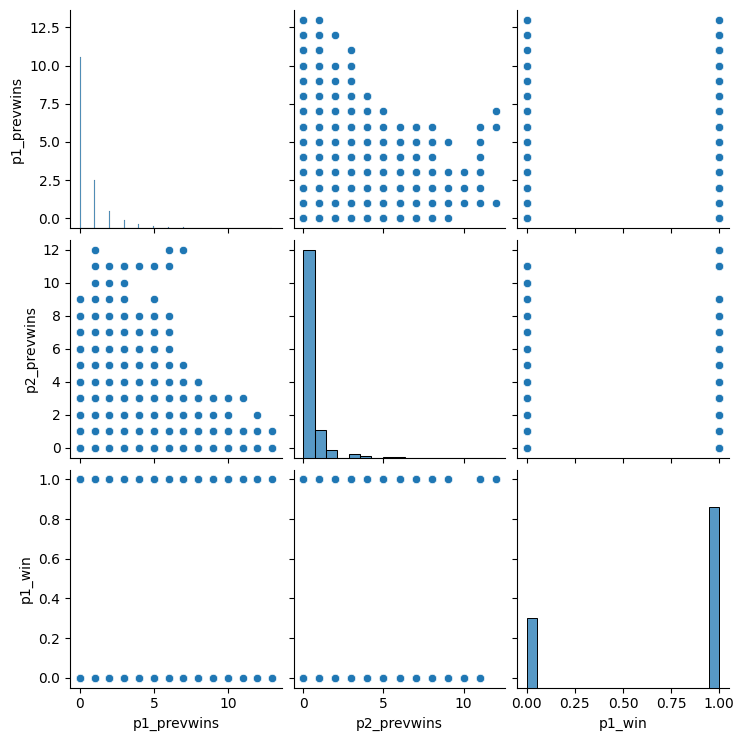

In [36]:
sns.pairplot(games_df[["p1_prevwins", "p2_prevwins", "p1_win"]])

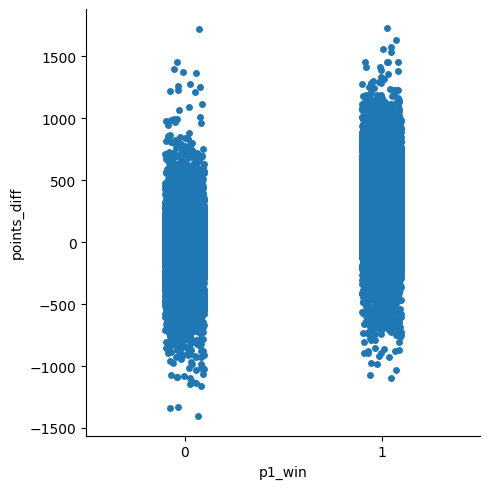

In [37]:
sns.catplot(x="p1_win", y="points_diff", data=games_df)